In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

In [2]:
dados = pd.read_csv('../csv/dados.csv', sep=',')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.74
1,11,1,23,2,12,1150,1.57
2,11,1,35,8,15,880,1.71
3,11,0,46,2,6,3500,1.70
4,11,1,47,8,9,150,1.84
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.55
76836,53,0,30,4,7,1500,1.72
76837,53,0,32,8,12,1300,1.83
76838,53,0,57,8,4,1500,1.57


In [3]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [4]:
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

C:\Users\47131502023.1\AppData\Local\Temp\ipykernel_18560\1990742766.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


Renda
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [5]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)*100
percentual

C:\Users\47131502023.1\AppData\Local\Temp\ipykernel_18560\2472905872.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Renda
E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: proportion, dtype: float64

In [6]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


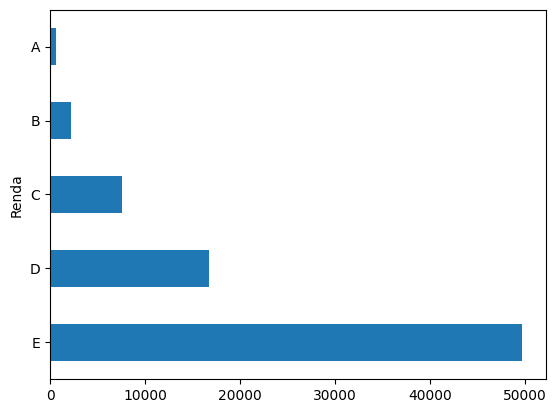

In [7]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.barh(rot=0);

## Histograma:

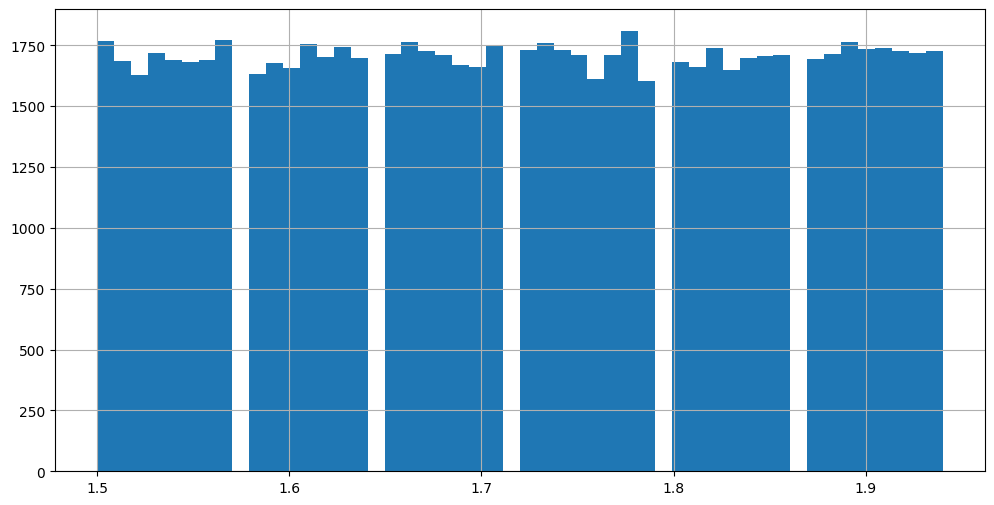

In [8]:
#bins número de barras ? figsize linhas e colunas
dados['Altura'].hist(bins = 50, figsize = (12,6));

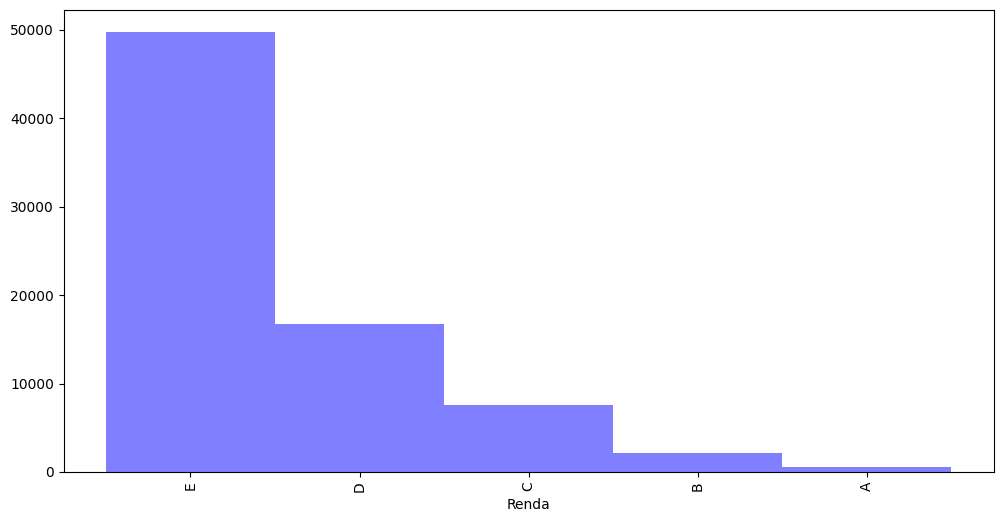

In [9]:
#alpha -> define tonalidade figsize -> define largura e altura em polegadas
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.5, figsize= (12, 6));

In [10]:
df = dados.copy()
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.74
1,11,1,23,2,12,1150,1.57
2,11,1,35,8,15,880,1.71
3,11,0,46,2,6,3500,1.70
4,11,1,47,8,9,150,1.84
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.55
76836,53,0,30,4,7,1500,1.72
76837,53,0,32,8,12,1300,1.83
76838,53,0,57,8,4,1500,1.57


<Axes: >

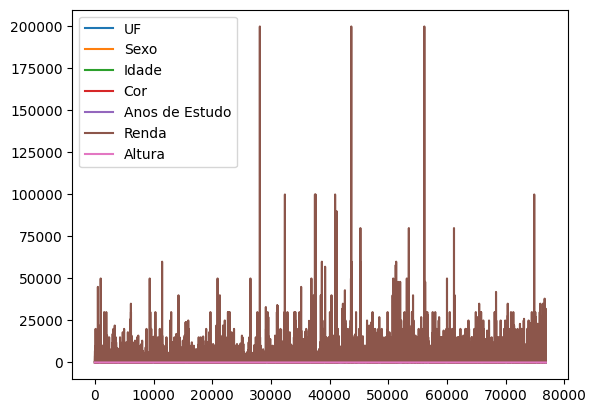

In [11]:
df.plot()

In [12]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

In [13]:
df['Genero'] = df['Sexo'].apply(lambda x: sexo[x])
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Genero
0,11,0,23,8,12,800,1.74,Masculino
1,11,1,23,2,12,1150,1.57,Feminino
2,11,1,35,8,15,880,1.71,Feminino
3,11,0,46,2,6,3500,1.70,Masculino
4,11,1,47,8,9,150,1.84,Feminino
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.55,Feminino
76836,53,0,30,4,7,1500,1.72,Masculino
76837,53,0,32,8,12,1300,1.83,Masculino
76838,53,0,57,8,4,1500,1.57,Masculino


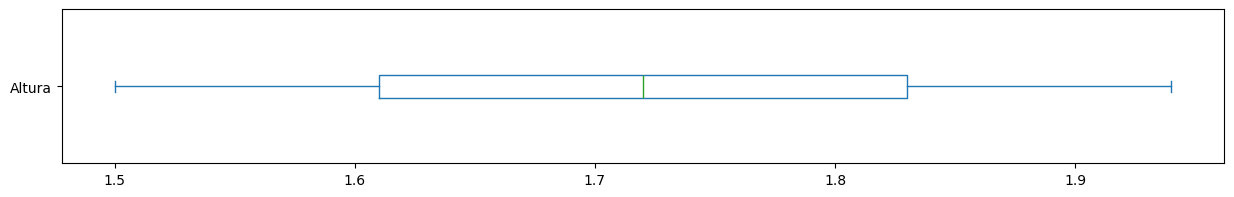

In [14]:
# vert -> imprimir na vertical ou horizontal figsize ->largura altura em polegadas
df['Altura'].plot.box(vert=False, figsize=(15,2));

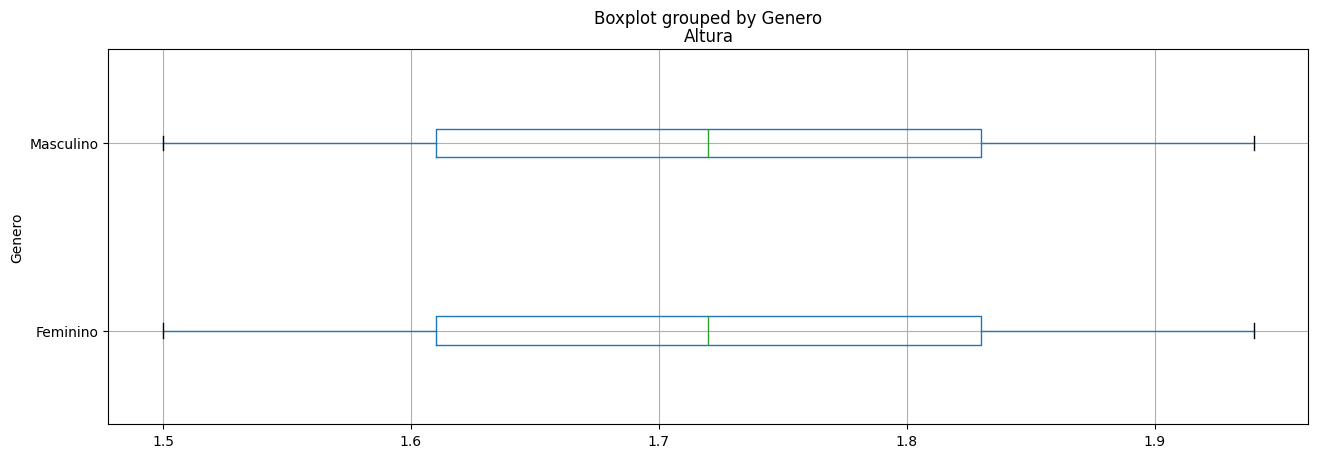

In [15]:
#faz o cruzamento das informações de genero e altura
boxplot = df.boxplot(vert = False, column='Altura', by='Genero', figsize =(15,5))

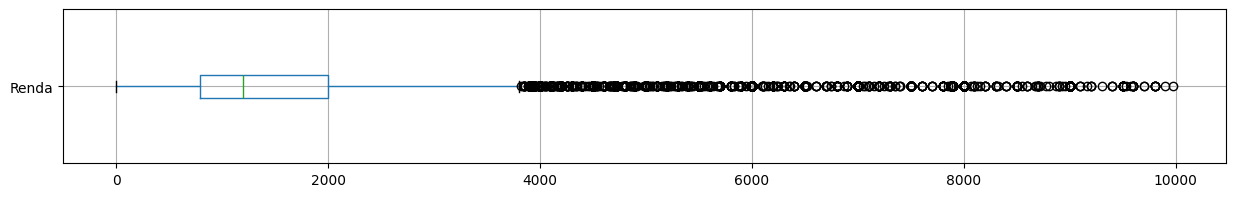

In [16]:
#verifica se a renda é menor que 10,000 e cria o gráfico da coluna de acordo como resultado da pesquisa
df.query('Renda < 10000').boxplot(vert=False, column='Renda', figsize=(15,2));

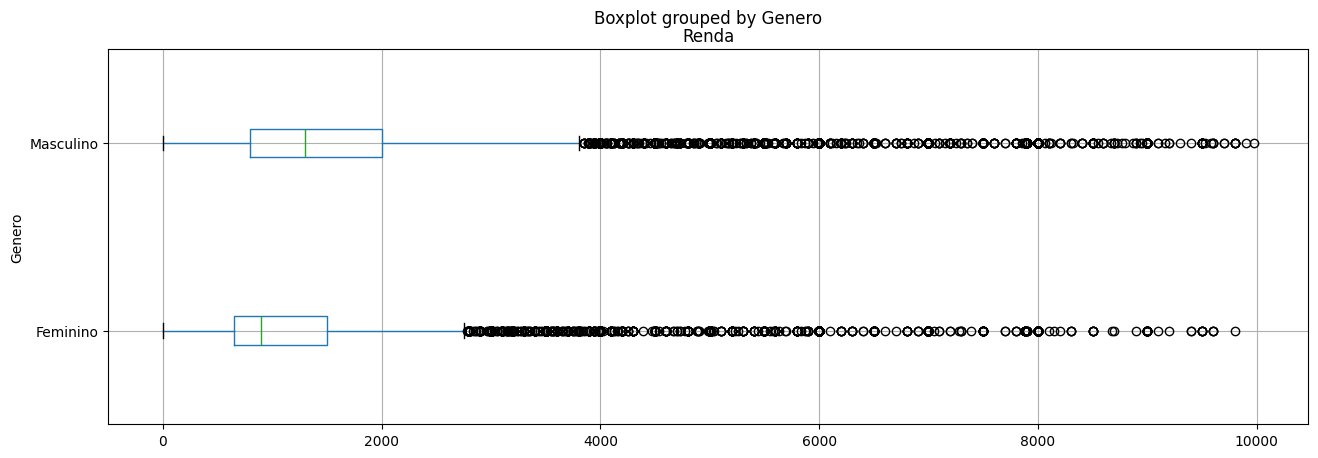

In [17]:
##verifica se a renda é menor que 10,000 e cria o gráfico da coluna de acordo como resultado da pesquisa cruzando dados por genero
df.query('Renda < 10000').boxplot(vert=False, column='Renda', by='Genero', figsize=(15,5));

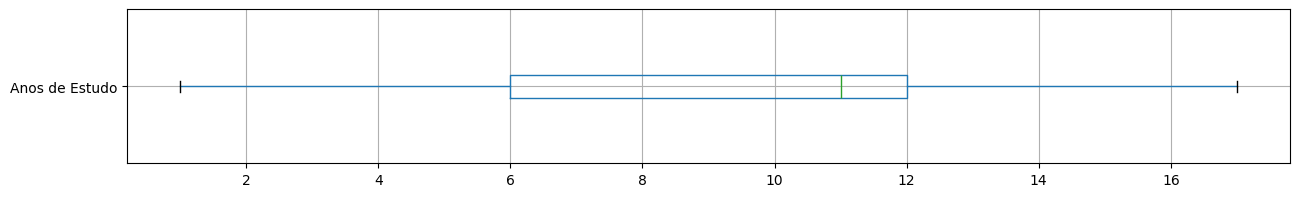

In [18]:
#verifica a mediana dos anos de estudo
df.boxplot(vert=False, column='Anos de Estudo', figsize=(15,2));

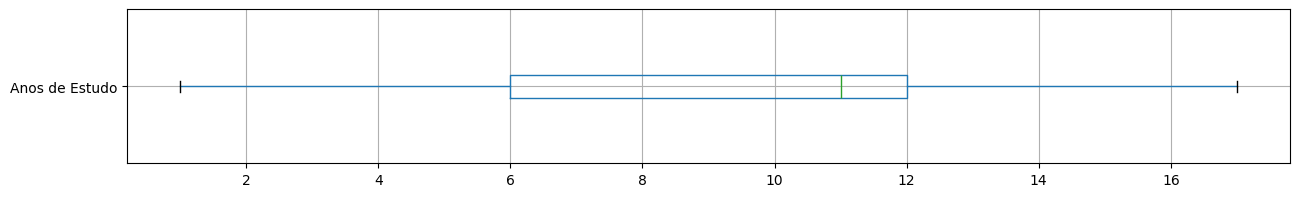

In [19]:
#verifica a mediana dos anos de estudo
df.boxplot(vert=False, column='Anos de Estudo', figsize=(15,2));

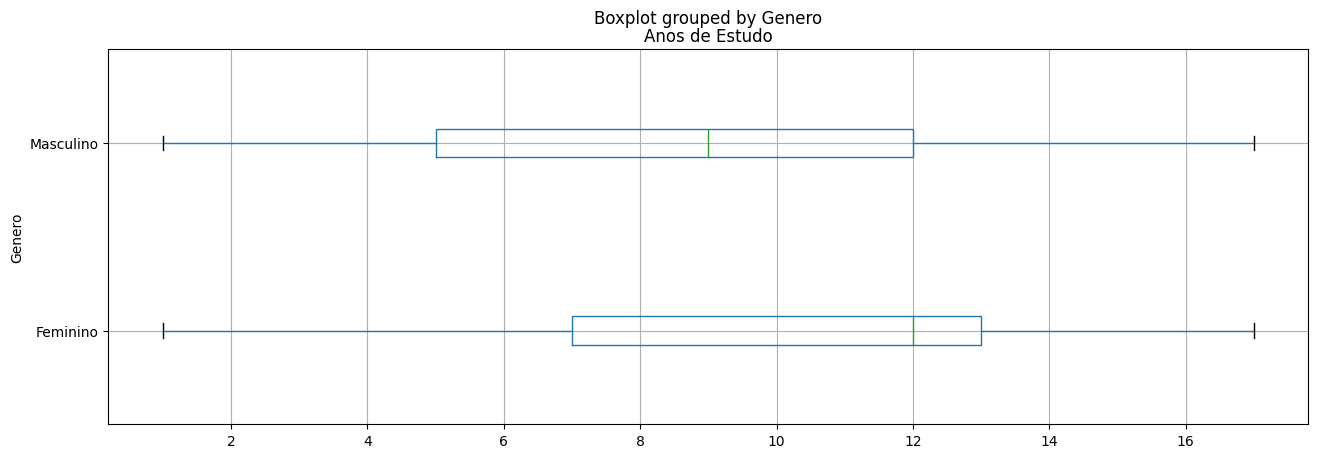

In [20]:
#verifica a mediana dos anos de estudo por genero (as mulheres estudam mais que os homens)
df.boxplot(vert=False, column='Anos de Estudo', by='Genero', figsize=(15,5));

In [21]:
df = pd.DataFrame(data = {'Fulano': [8.0, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])

df.index.name = 'Matérias'
df.columns.name = 'Alunos'

df

Alunos,Fulano,Beltrano,Sicrano
Matérias,,,
Matemática,8.0,10.0,7.5
Português,10.0,2.0,8.0
Inglês,4.0,0.5,7.0
Geografia,8.0,1.0,8.0
História,6.0,3.0,8.0
Física,10.0,9.5,8.5
Química,8.0,10.0,7.0


array([[<Axes: xlabel='Matérias'>, <Axes: xlabel='Matérias'>,
        <Axes: xlabel='Matérias'>]], dtype=object)

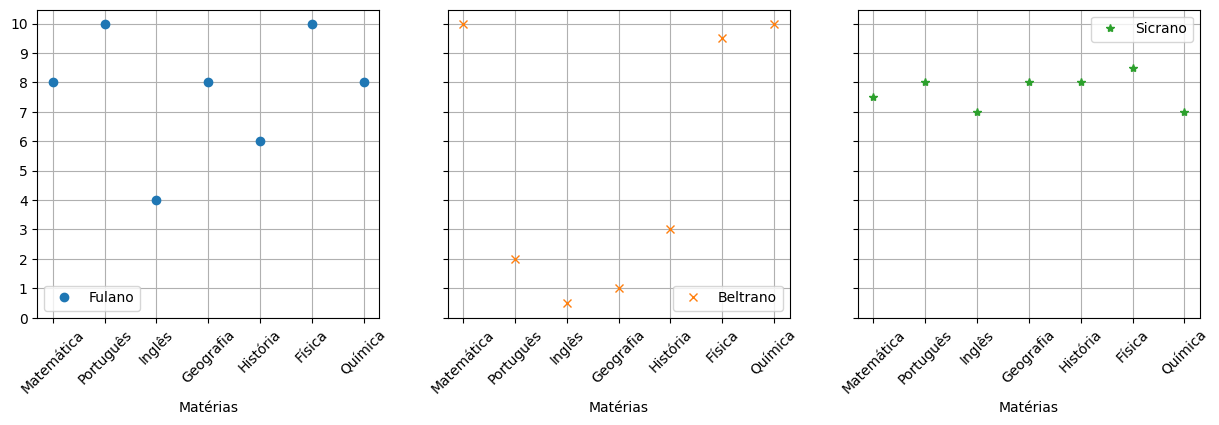

In [22]:
#style os marcadores / subplots separa por categorias / sharey -> mostra ou não os números em Y / largura altura dos quadros/
#yticks --> como gerar o eixo Y grid -> mostra ou não
df.plot(style=['o','x','*'], rot=45,
        subplots=True, figsize=(15,4),
        sharey=True, layout=(1,3),
        yticks=range(0,11), grid=True)

In [23]:
df.mean

<bound method DataFrame.mean of Alunos      Fulano  Beltrano  Sicrano
Matérias                             
Matemática     8.0      10.0      7.5
Português     10.0       2.0      8.0
Inglês         4.0       0.5      7.0
Geografia      8.0       1.0      8.0
História       6.0       3.0      8.0
Física        10.0       9.5      8.5
Química        8.0      10.0      7.0>

In [24]:
notas_fulano = df[['Fulano']]
notas_fulano

Alunos,Fulano
Matérias,
Matemática,8.0
Português,10.0
Inglês,4.0
Geografia,8.0
História,6.0
Física,10.0
Química,8.0


In [25]:
nota_media_fulano = df['Fulano'].mean()
nota_media_fulano

7.714285714285714

In [26]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

C:\Users\47131502023.1\AppData\Local\Temp\ipykernel_18560\349761232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano


Alunos,Fulano,Desvio
Matérias,,
Matemática,8.0,0.285714
Português,10.0,2.285714
Inglês,4.0,-3.714286
Geografia,8.0,0.285714
História,6.0,-1.714286
Física,10.0,2.285714
Química,8.0,0.285714


In [27]:
notas_fulano.index

Index(['Matemática', 'Português', 'Inglês', 'Geografia', 'História', 'Física',
       'Química'],
      dtype='object', name='Matérias')

In [28]:
#função abs absoluto tira o -
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Alunos,Fulano,Desvio,|Desvio|
Matérias,,,
Matemática,8.0,0.285714,0.285714
Português,10.0,2.285714,2.285714
Inglês,4.0,-3.714286,3.714286
Geografia,8.0,0.285714,0.285714
História,6.0,-1.714286,1.714286
Física,10.0,2.285714,2.285714
Química,8.0,0.285714,0.285714


In [29]:
notas_fulano['Média'] = nota_media_fulano

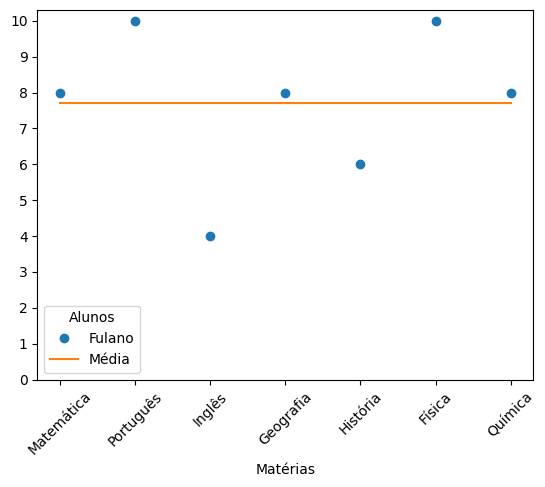

In [30]:
# mostrando a media do aluno nas materias em relaçao a sua media
notas_fulano[['Fulano','Média']].plot(style = ['o','-'], rot=45,yticks=range(0,11));

In [31]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [32]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

Alunos,Fulano,Desvio,|Desvio|,Média
Matérias,,,,
Matemática,8.0,0.285714,0.285714,7.714286
Português,10.0,2.285714,2.285714,7.714286
Inglês,4.0,-3.714286,3.714286,7.714286
Geografia,8.0,0.285714,0.285714,7.714286
História,6.0,-1.714286,1.714286,7.714286
Física,10.0,2.285714,2.285714,7.714286
Química,8.0,0.285714,0.285714,7.714286


In [33]:
price = pd.read_csv('../csv/price_stocks.csv',index_col='Date')
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2010-01-04,6.57,91.51,23.99,312.20
2010-01-05,6.58,90.40,24.00,310.83
2010-01-06,6.48,89.81,23.86,302.99
2010-01-07,6.47,89.50,23.61,295.94
2010-01-08,6.51,90.40,23.77,299.89


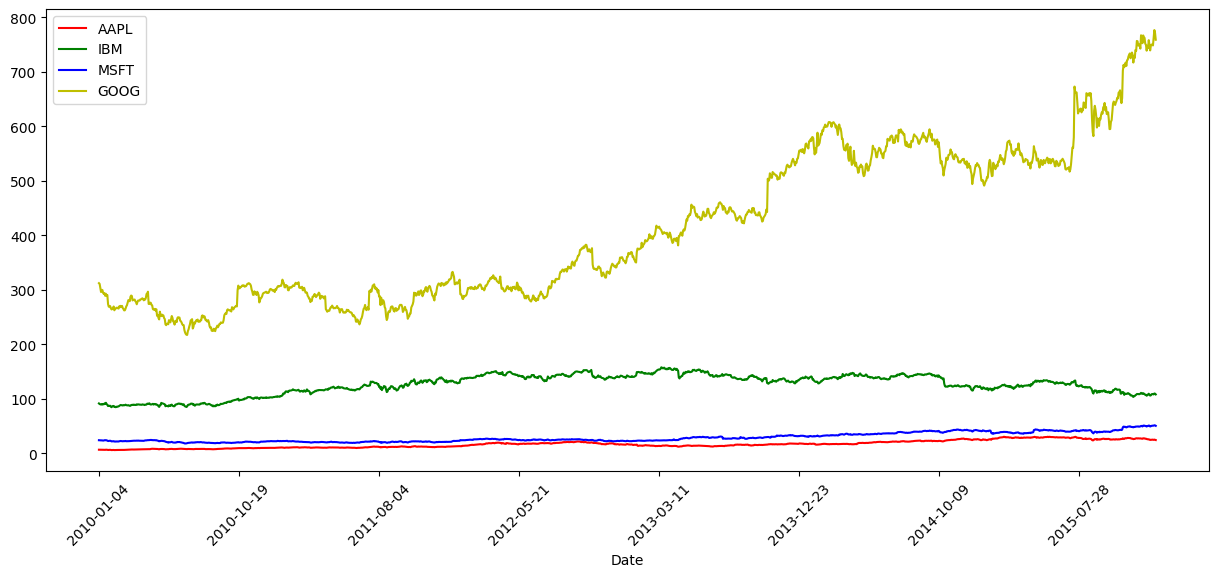

In [34]:
#style -> com cores red,green,blue e yelow
price.plot(style=['r-','g-','b-','y-'], rot=45, figsize=(15,6));

In [35]:
# o head imprime os 5 primeiros
volume = pd.read_csv('../csv/volume_stocks.csv',index_col='Date')
volume.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2010-01-04,493729600,6155300,38409100,3927065
2010-01-05,601904800,6841400,49749600,6031925
2010-01-06,552160000,5605300,58182400,7987226
2010-01-07,477131200,5840600,50559700,12876685
2010-01-08,447610800,4197200,51197400,9484016


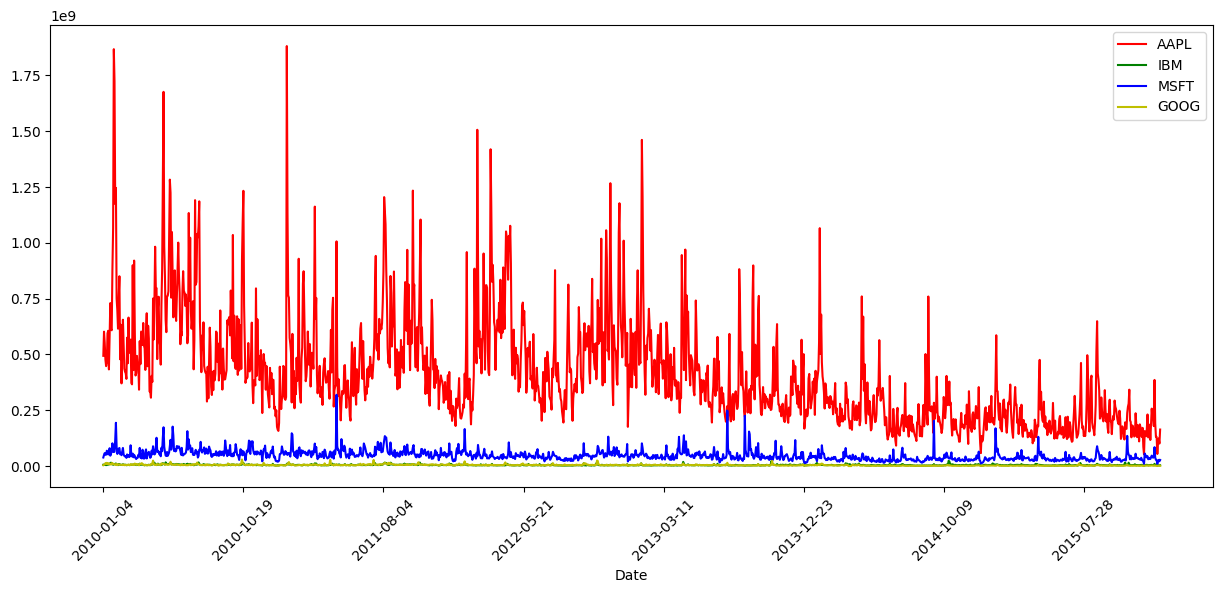

In [36]:
volume.plot(style=['r-','g-','b-','y-'], rot=45, figsize=(15,6));

- Vamos calcular o percentual de mudança nos preços

In [37]:
#tail ->retorna os ultimos 5 pct_change -->função para encontrar a mudança percentual nos dados da série temporal
#calcula entre o atual e o anterior
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2015-12-24,-0.005582,-0.002115,-0.002564,-0.002546
2015-12-28,-0.011227,-0.004607,0.004944,0.018854
2015-12-29,0.018248,0.015736,0.010823,0.018478
2015-12-30,-0.013142,-0.003099,-0.004283,-0.007211
2015-12-31,-0.019370,-0.012341,-0.014858,-0.015720


O metodo corr de Series calcula a correlaão entre os valores diferntes de NA de duas Series, alinhados pelo indice e que se sobrepoem.

In [38]:
returns['MSFT'].corr(returns['IBM'])

0.5080444874087221

In [39]:
returns['MSFT'].cov(returns['IBM'])

8.90138360893615e-05

In [40]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.397686,0.379402,0.405395
IBM,0.397686,1.000000,0.508044,0.413306
MSFT,0.379402,0.508044,1.000000,0.444555
GOOG,0.405395,0.413306,0.444555,1.000000


In [41]:
returns.cov

<bound method DataFrame.cov of                 AAPL       IBM      MSFT      GOOG
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.001522 -0.012130  0.000417 -0.004388
2010-01-06 -0.015198 -0.006527 -0.005833 -0.025223
2010-01-07 -0.001543 -0.003452 -0.010478 -0.023268
2010-01-08  0.006182  0.010056  0.006777  0.013347
...              ...       ...       ...       ...
2015-12-24 -0.005582 -0.002115 -0.002564 -0.002546
2015-12-28 -0.011227 -0.004607  0.004944  0.018854
2015-12-29  0.018248  0.015736  0.010823  0.018478
2015-12-30 -0.013142 -0.003099 -0.004283 -0.007211
2015-12-31 -0.019370 -0.012341 -0.014858 -0.015720

[1510 rows x 4 columns]>

<Axes: xlabel='Date'>

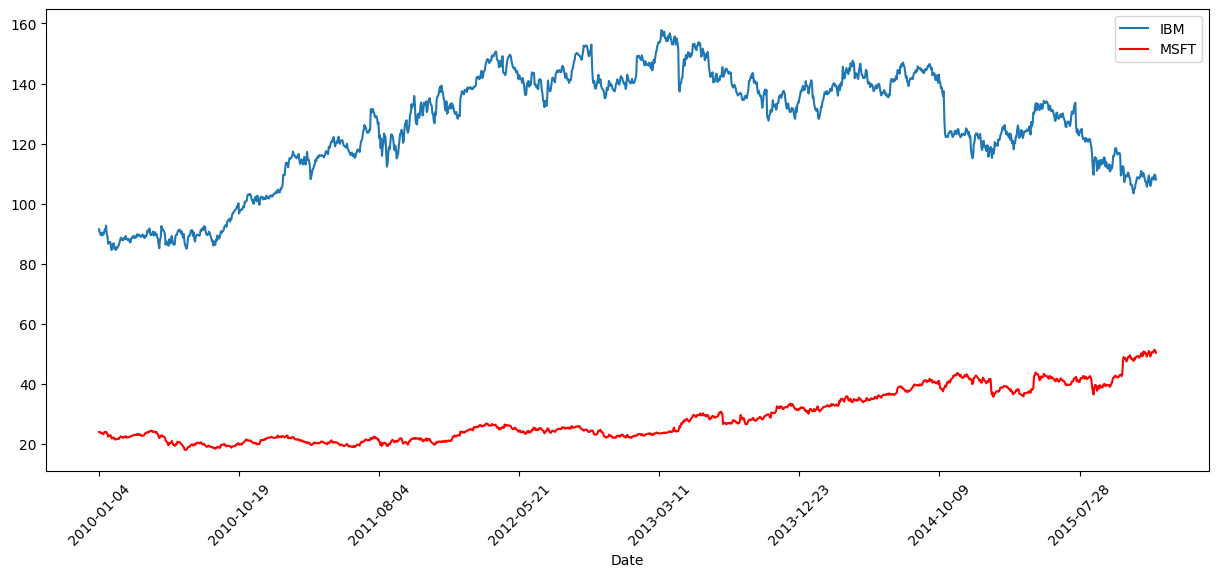

In [42]:
price[['IBM','MSFT']].plot(style=['-','r-'], rot=45,figsize=(15,6))

Ao usar o método corrwith de DataFrame, podemos calcular correlações de pares entre as colunas ou linhas de um DataFrame com outra Series ou um DataFrame. Passar uma Series devolve uma Series com o valor das correlações calculado para outra coluna.

In [43]:
#calculou correlação do dataframe returns com a couna IBM
returns.corrwith(returns['IBM'])

AAPL    0.397686
IBM     1.000000
MSFT    0.508044
GOOG    0.413306
dtype: float64

In [44]:
#calculou entre o dataframe returns e o volume
returns.corrwith(volume)

AAPL   -0.082692
IBM    -0.202109
MSFT   -0.083289
GOOG   -0.000192
dtype: float64

## Atividade: Treinando o visual
#### ➔ COMO FAZER?
    1. Criar um gráfico de linhas das disciplinas x notas;
    2. Criar um gráfico de linhas dos alunos x notas;


In [45]:
df = pd.DataFrame(data = {'Fulano': [8.0, 10, 4, 8, 6, 10, 8],
'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
index = ['Matemática',
'Português',
'Inglês',
'Geografia',
'História',
'Física',
'Química'])

df.index.name = 'Matérias'
df.columns.name = 'Alunos'

df

Alunos,Fulano,Beltrano,Sicrano
Matérias,,,
Matemática,8.0,10.0,7.5
Português,10.0,2.0,8.0
Inglês,4.0,0.5,7.0
Geografia,8.0,1.0,8.0
História,6.0,3.0,8.0
Física,10.0,9.5,8.5
Química,8.0,10.0,7.0


<Axes: xlabel='Matérias'>

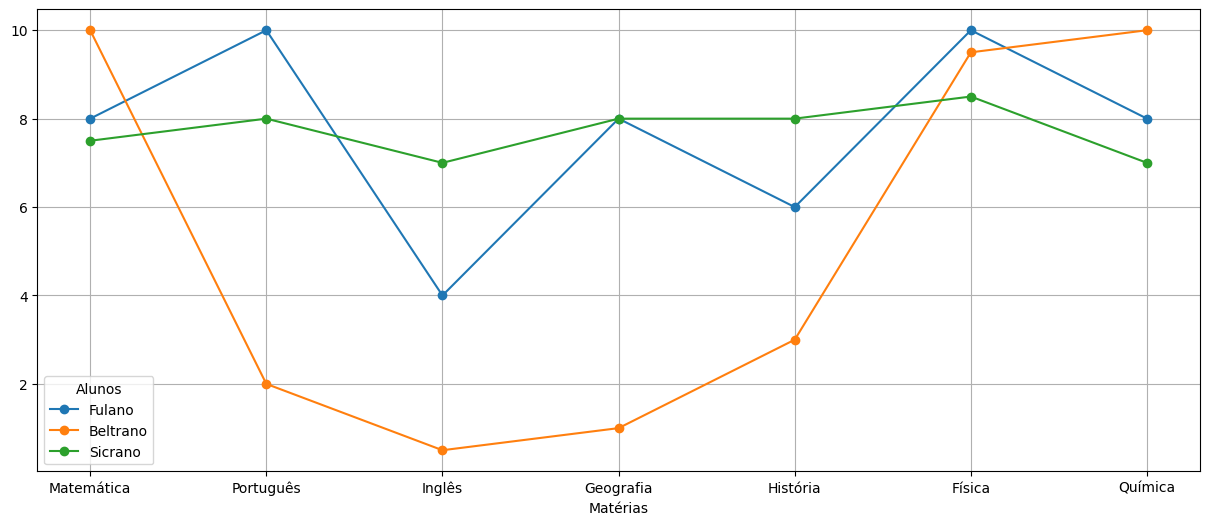

In [46]:
#  1. Criar um gráfico de linhas das disciplinas x notas;
df.plot(marker='o', grid=True, rot=0, figsize=(15,6))

<Axes: xlabel='Alunos'>

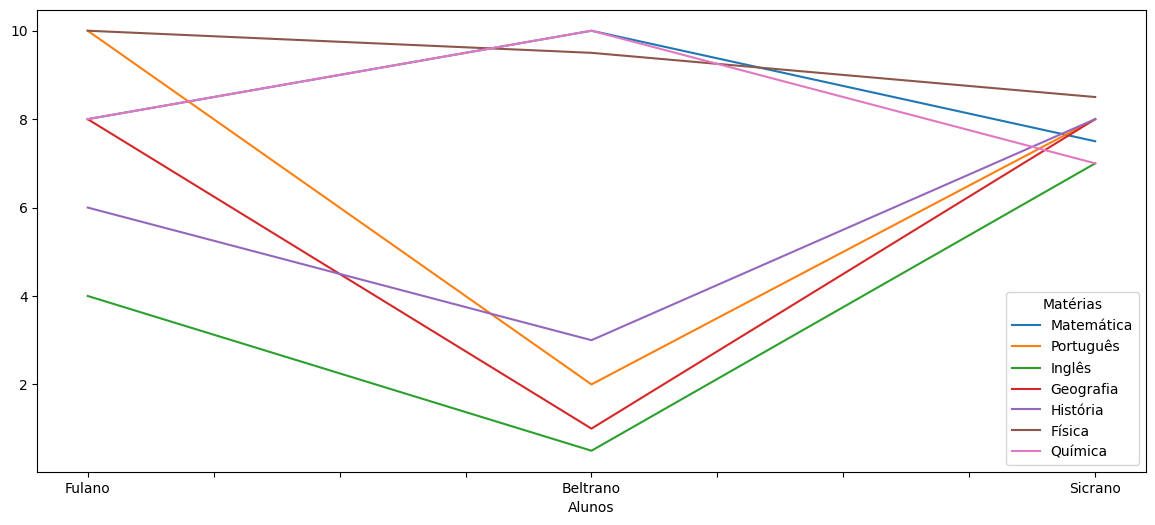

In [47]:
# 2. Criar um gráfico de linhas dos alunos x notas;
df.T.plot(rot=0, figsize=(14.3,6))

<Axes: ylabel='Alunos'>

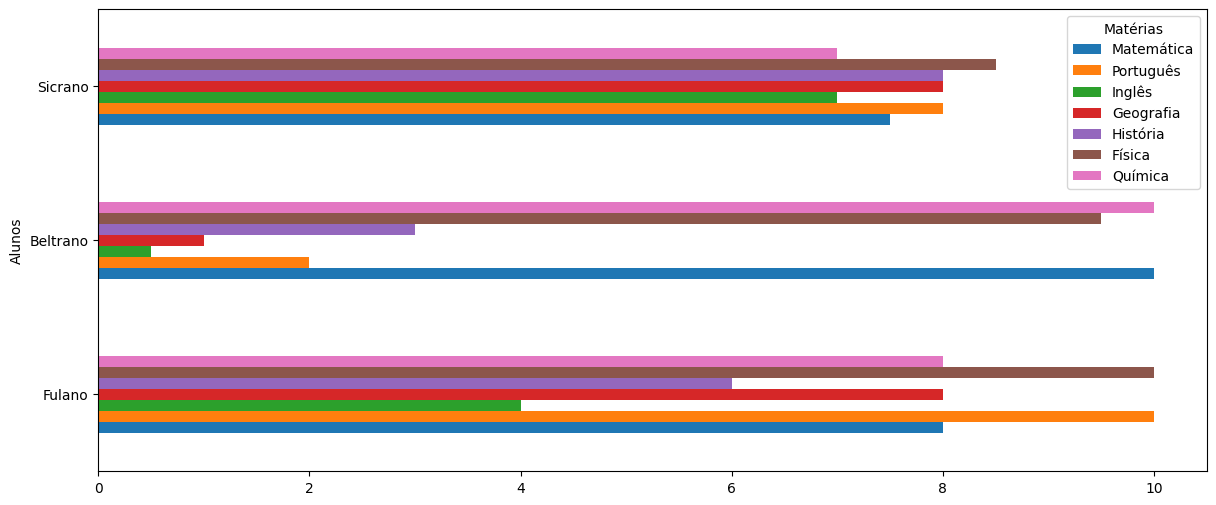

In [48]:
df.T.plot.barh(rot=0, figsize=(14.3,6))

In [49]:
corr_matrix = df.corr()

print("Matriz de correlação:")
print(corr_matrix)

Matriz de correlação:
Alunos      Fulano  Beltrano   Sicrano
Alunos                                
Fulano    1.000000  0.441926  0.608898
Beltrano  0.441926  1.000000 -0.030602
Sicrano   0.608898 -0.030602  1.000000


array([[<Axes: xlabel='Matérias'>, <Axes: xlabel='Matérias'>,
        <Axes: xlabel='Matérias'>]], dtype=object)

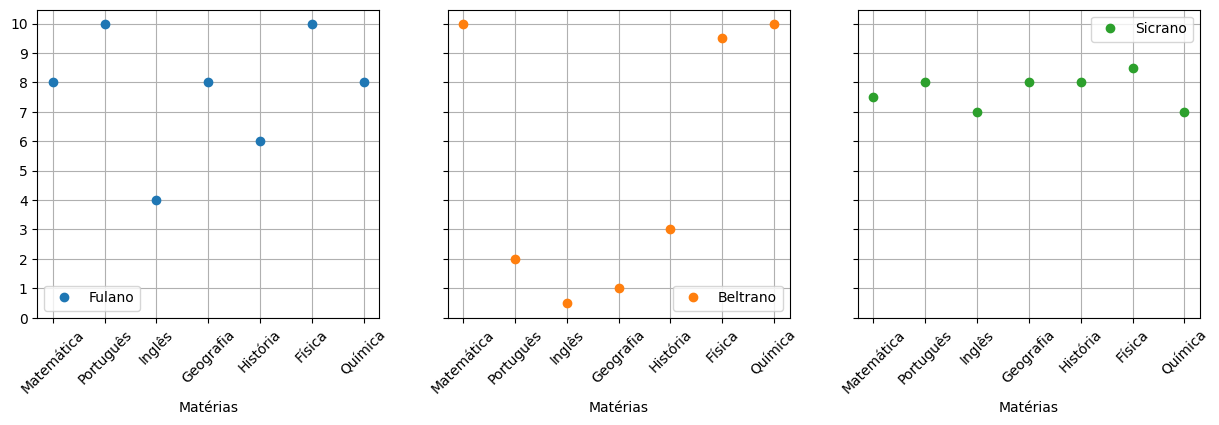

In [50]:
#5
df.plot(style=['o','o','o'], rot=45,
        subplots=True, figsize=(15,4),
        sharey=True, layout=(1,3),
        yticks=range(0,11), grid=True)

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [53]:
# Carregando o dataset com informações da plataforma Airbnb.
listing = pd.read_csv('../csv/listings_cleaned.csv')
listing

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10463735,Sobrado aconchegante e espaçoso,53918534,Quiá,NaN,Laranjeiras,-2.293.555,-4.319.107,Entire home/apt,581,1,2,2018-02-14,0.03,6,181
1,53887789,Quadra da praia,333527901,Lucas,NaN,Copacabana,-2.297.032,-4.318.081,Entire home/apt,898,5,0,NaN,NaN,2,365
2,783493769216852616,"Leme, Brasil",491704706,Felipe,NaN,Leme,-2.296.421,-431.716,Entire home/apt,720,1,0,NaN,NaN,2,362
3,703973293620197060,Suíte com entrada independente em casarão 1,20362236,Júlio Cesar,NaN,Botafogo,-2.295.792.000.774.180,-4.318.222.590.793.450,Private room,599,4,1,2022-09-06,0.26,4,363
4,782895997622988215,Apartamento próximo ao metrô,302417043,Laís,NaN,Laranjeiras,-2.293.196,-4.318.018,Entire home/apt,240,3,0,NaN,NaN,1,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,689013693819928481,Apartamento no Recreio para o Rock in Rio,472932703,Adriana,NaN,Recreio dos Bandeirantes,-23.018.123.668.654.700,-43.466.737.450.193.000,Entire home/apt,871,3,1,2022-09-10,0.27,1,365
28297,23414904,Nice tranquil apartment in Copacabana,100247568,Cecilia,NaN,Copacabana,-2.296.043,-4.317.409,Entire home/apt,194,2,50,2022-09-05,0.86,1,259
28298,48489080,Praia de Botafogo ao lado do Metrô,172482654,Evilene,NaN,Botafogo,-2.294.558,-4.318.361,Entire home/apt,153,15,18,2022-11-20,0.95,13,58
28299,43109156,Lindo apart. 250 mega internet a 300m Praia Leme,46082356,Patrícia,NaN,Botafogo,-2.295.911,-4.317.838,Entire home/apt,457,10,19,2022-12-03,0.60,4,204


No presente projeto busca-se resolver os seguintes problemas identificados pelo contratante do projeto:

Quais os principais tipos de imóveis locados na cidade do Rio de Janeiro?
Quais os bairros com maior custo de locação na cidade do Rio de Janeiro?
Qual o custo médio de locação das unidades na cidade do Rio de Janeiro?
Qual a quantidade média de diárias por locação na cidade do Rio de Janeiro?
Qual a disponibidade médias dos imóveis na cidade do Rio de Janeiro?

In [54]:
listing.shape

(7, 3)

Dicionário das variáveis

    id - número de id gerado para identificar o imóvel.
    name - nome da propriedade anunciada.
    host_id - número de id do proprietário (anfitrião) da propriedade.
    host_name - Nome do anfitrião.
    neighbourhood_group - esta coluna não contém nenhum valor válido.
    neighbourhood - nome do bairro.
    latitude - coordenada da latitude da propriedade.
    longitude - coordenada da longitude da propriedade.
    room_type - informa o tipo de quarto que é oferecido.
    price - preço para alugar o imóvel.
    minimum_nights - quantidade mínima de noites para reservar.
    number_of_reviews - número de reviews que a propriedade possui.
    last_review - data do último review.
    reviews_per_month - quantidade de reviews por mês.
    calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião.
    availability_365 - número de dias de disponibilidade dentro de 365 dias.

In [56]:
display(df.dtypes)

Alunos
Fulano      float64
Beltrano    float64
Sicrano     float64
dtype: object

In [57]:
listing.head()

Alunos,Fulano,Beltrano,Sicrano
Matérias,,,
Matemática,8.0,10.0,7.5
Português,10.0,2.0,8.0
Inglês,4.0,0.5,7.0
Geografia,8.0,1.0,8.0
História,6.0,3.0,8.0


In [ ]:
# Comando para visualizarmos as 5 últimas linhas do Dataset.
listing.tail()

In [58]:
# Cálculo do percentual de dados faltantes no Dataset.
#shape(0)-todas as linhas

(listing.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Alunos
Fulano      0.0
Beltrano    0.0
Sicrano     0.0
dtype: float64

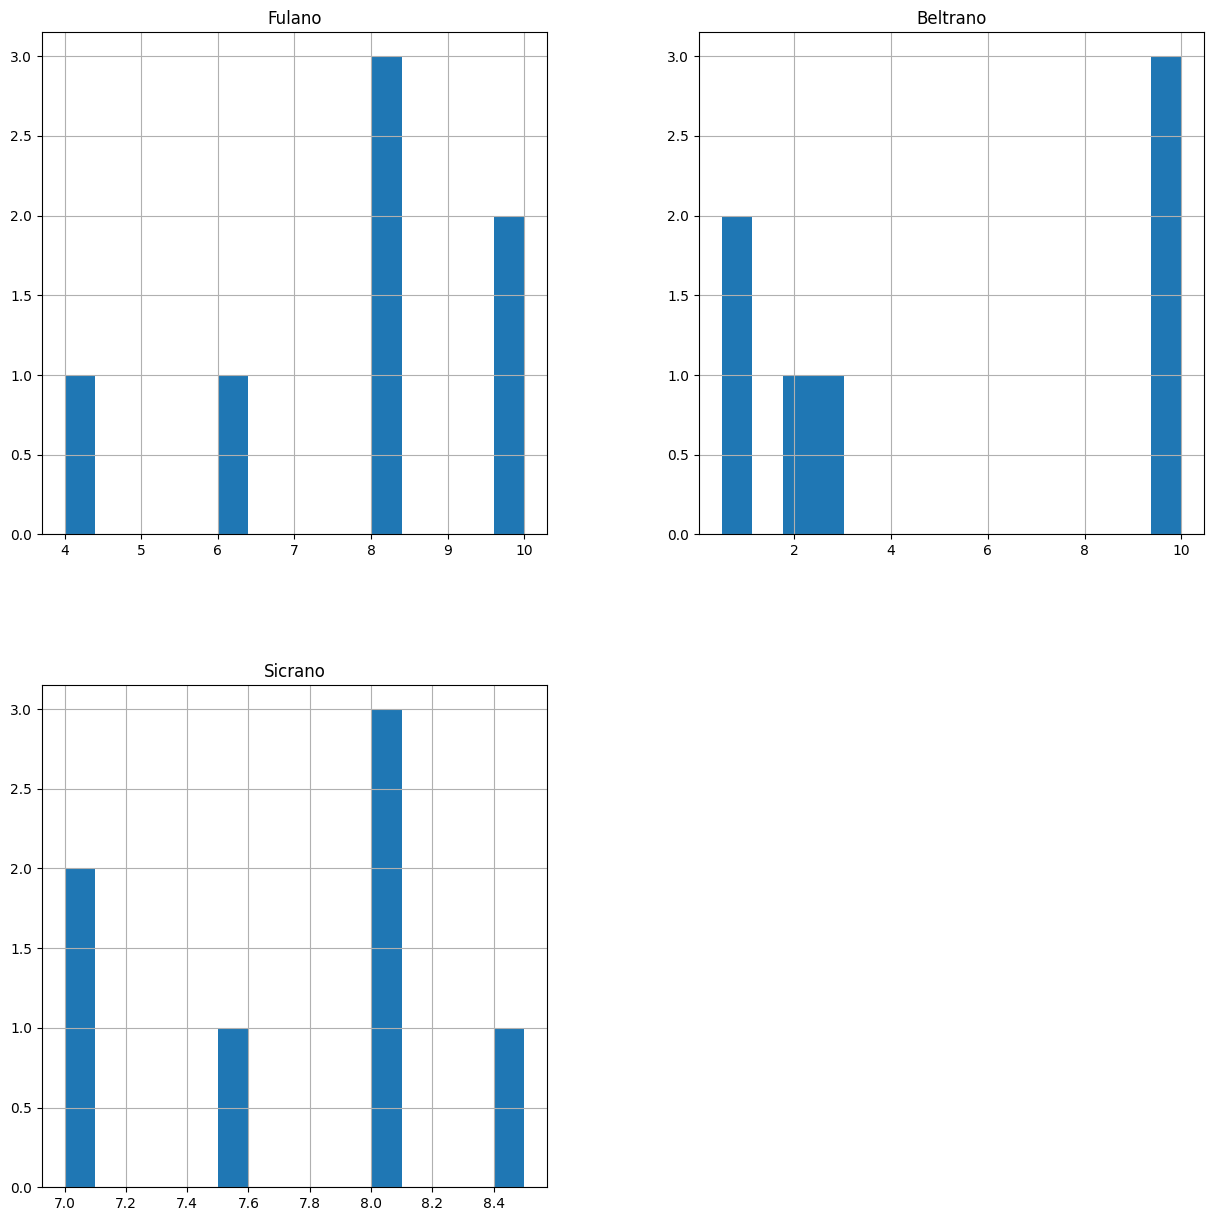

In [59]:
# Contrução dos histogramas das variáveis do dataset.

listing.hist(bins=15, figsize=(15,15));

In [61]:
# Construindo os resumos estatísticos das variáveis numéricas usando a função describe.

listing[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,28301.000000,28301.000000,28301.000000,19783.000000,28301.000000,28301.000000
mean,1448.447369,4.904138,17.502420,0.894104,9.448677,207.147168
std,9631.935666,24.675970,37.786946,1.026587,27.668056,136.190680
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,317.000000,1.000000,0.000000,0.190000,1.000000,76.000000
50%,600.000000,2.000000,3.000000,0.540000,2.000000,223.000000
75%,1071.000000,4.000000,16.000000,1.240000,4.000000,350.000000
max,604981.000000,1125.000000,563.000000,18.170000,228.000000,365.000000


<Axes: >

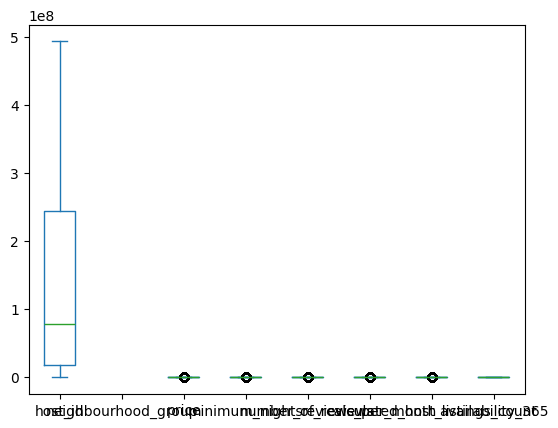

In [62]:
listing.plot.box()